# Data Science Festival 2020
## Going postal: How to craft a cutting-edge route optimisation engine in-house that suits your business needs

Fabrice Durier - fabrice.durier@royalmail.com 

Hugo Galy - hugo.galy@royalmail.com

Louisa Sober - louisa.sober@royalmail.com


## Background Information

Structure of a postcode EH12 9DN:
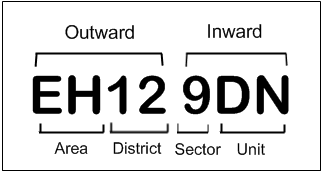

Info on what a delivery office does

## Setting up Constraints

In [1]:
import os
import matplotlib.pyplot as plt 

In [2]:
os.getcwd()
os.chdir('./src/')
%pwd

'/Users/louisasober/rm_projects/dsf_2020/src'

In [3]:
import params as setup

In [4]:
setup_dict = dict([(name, cls) for name, cls in setup.__dict__.items() if "__" not in name])
for idx, key in enumerate(setup_dict):
    if idx < 6:
        print(key,"=",setup_dict[key])

depot_name = EDINBURGH
sample_name = sample_050
max_vans = 5
max_duty = 240
service_time = 5
departure_time = 10:00


In [5]:
setup.sample_name = "sample_050"
setup.max_vans = 5

## Import data

In [6]:
from puzzle import puzzle_class

In [7]:
puzzle = puzzle_class(input=setup)


Puzzle Constraints:

	 Depot Name:            EDINBURGH
	 Depot Postcode:        EH12 9PB
	 Depot Latitude:        55.92849341
	 Depot Longitude:       -3.301661855
	 Depot Max Fleet Size:   5 [vans]
	 Depot Max Duty Time:  240 [min]
	 Depot Service Time:     5 [min]

Delivery Points Coordinates:

        postcode   latitude  longitude
id                                    
pc_001  EH21 6NX  55.939856  -3.065513
pc_002  EH14 5SW  55.890223  -3.330329
pc_003  EH11 3BD  55.936345  -3.253339
pc_004   EH7 5NW  55.960307  -3.172372
pc_005  EH15 2NW  55.944777  -3.094582
pc_006  EH12 9AW  55.932246  -3.279730
pc_007  EH14 5QE  55.896023  -3.314887
pc_008   EH9 2LP  55.931263  -3.183899
pc_009  EH33 2QT  55.933932  -2.949380
pc_010  EH52 6NG  55.946943  -3.509429
pc_011  EH38 5YR  55.770405  -2.939215
pc_012  EH14 5EJ  55.903713  -3.291282
pc_013  EH28 8TH  55.942340  -3.405591
pc_014  EH20 9ED  55.881640  -3.154205
pc_015  EH55 8SE  55.857976  -3.554579
pc_016  EH47 0EW  55.866868  -3.69511

## Initial Exploration

* stats of the dist and time matrices
* how many parcels, stops
* hub info

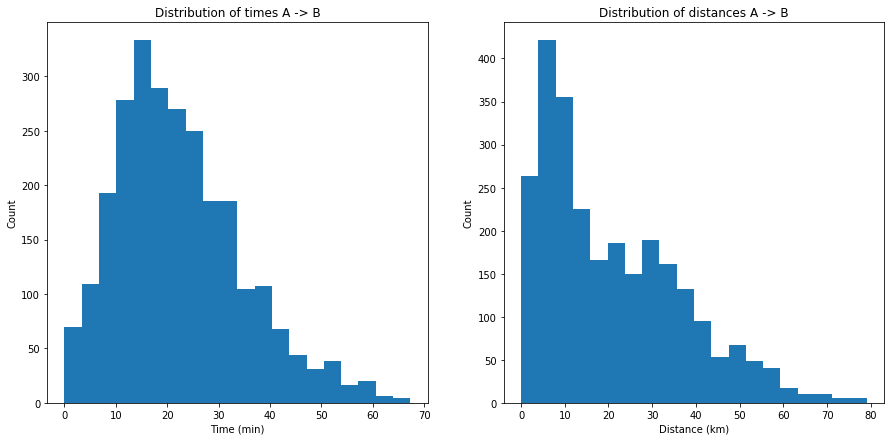

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax1.hist(puzzle.time_mtx.values.flatten(), 20)
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Count')
ax1.set_title(r'Distribution of times A -> B')

ax2.hist(puzzle.distance_mtx.values.flatten(), 20)
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('Count')
ax2.set_title(r'Distribution of distances A -> B')

plt.show()

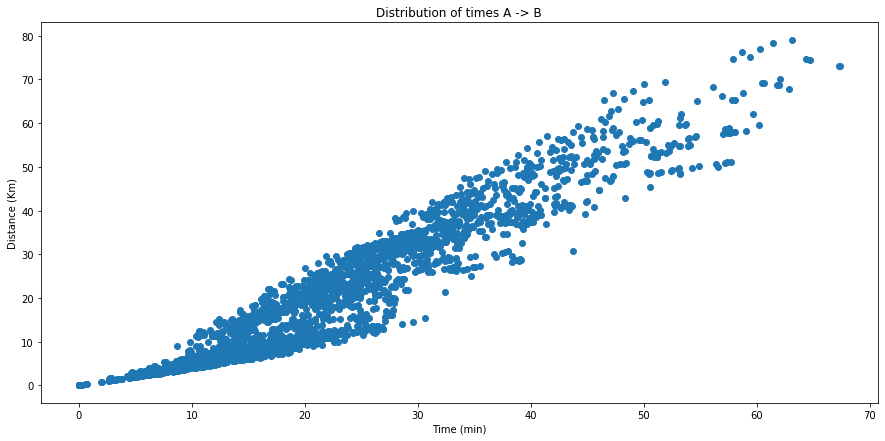

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(puzzle.time_mtx.values.flatten(), puzzle.distance_mtx.values.flatten())
ax.set_xlabel('Time (min)')
ax.set_ylabel('Distance (Km)')
ax.set_title(r'Distribution of times A -> B')
plt.show()

## Visulatisation

In [10]:
from viz import init_map, routes_map

In [11]:
init_map(puzzle, "delivery_point_locations.html")

In [12]:
from routes import routes_class

In [13]:
init_routes = routes_class(puzzle)

In [14]:
init_routes.build_at_random(puzzle)


 Initialisation of Routes at Random...


In [15]:
routes_map(puzzle, init_routes, "init_routes_random.html")

In [16]:
init_routes.build_from_postcodes(puzzle)


 Initialisation of Routes from Sorted Postcodes...


In [17]:
routes_map(puzzle, init_routes, "init_routes_postcodes.html")

## Run pipeline

In [18]:
from engine import main

In [19]:
# Run pipeline
final_route, record_perf_df = main()


##################################################################

	...Loading Dataset...

Puzzle Constraints:

	 Depot Name:            EDINBURGH
	 Depot Postcode:        EH12 9PB
	 Depot Latitude:        55.92849341
	 Depot Longitude:       -3.301661855
	 Depot Max Fleet Size:   5 [vans]
	 Depot Max Duty Time:  240 [min]
	 Depot Service Time:     5 [min]

Delivery Points Coordinates:

        postcode   latitude  longitude
id                                    
pc_001  EH21 6NX  55.939856  -3.065513
pc_002  EH14 5SW  55.890223  -3.330329
pc_003  EH11 3BD  55.936345  -3.253339
pc_004   EH7 5NW  55.960307  -3.172372
pc_005  EH15 2NW  55.944777  -3.094582
pc_006  EH12 9AW  55.932246  -3.279730
pc_007  EH14 5QE  55.896023  -3.314887
pc_008   EH9 2LP  55.931263  -3.183899
pc_009  EH33 2QT  55.933932  -2.949380
pc_010  EH52 6NG  55.946943  -3.509429
pc_011  EH38 5YR  55.770405  -2.939215
pc_012  EH14 5EJ  55.903713  -3.291282
pc_013  EH28 8TH  55.942340  -3.405591
pc_014  EH20 9ED  55.88

AttributeError: module 'lns' has no attribute 'run'

## Analysis

In [ ]:
routes_map(puzzle, final_route, "final_routes_postcodes.html")

In [ ]:
final_route.cost

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(record_perf_df.index, record_perf_df.route_cost, color='blue', label='route cost')
plt.plot(record_perf_df.index, record_perf_df.best_cost, color='red',label='best cost')
plt.title('Simulated Annealing')
plt.xlabel('Number of iterations')
plt.ylabel('Total time of routes')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 1.05))